In [1]:
"""
Created on Wed Nov 24, 2021
Hardware Specs: Oryx Pro, 
Operating System: Pop!OS

@author Matt Lomicka
@team Andrew Jackson
@references Géron, A. (2020). Chapter 9: Unsupervised Learning Techniques. In Hands-on machine learning with scikit-learn, Keras, and tensorflow: Concepts, tools, and techniques to build Intelligent Systems (pp. 238–250). essay, O'Reilly. 
"""

"\nCreated on Wed Nov 24, 2021\nHardware Specs: Oryx Pro, \nOperating System: Pop!OS\n\n@author Matt Lomicka\n@team Andrew Jackson\n@references Géron, A. (2020). Chapter 9: Unsupervised Learning Techniques. In Hands-on machine learning with scikit-learn, Keras, and tensorflow: Concepts, tools, and techniques to build Intelligent Systems (pp. 238–250). essay, O'Reilly. \n"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Import Excel data as Dataframe

In [3]:
df = pd.read_excel (r'BLS-QUIT_2001-2021.xlsx')
months = list(df['Month'])
df_original = df
display(df)

Month  Total nonfarm  Mining and logging  Construction  \
0   2001-01-01            2.4                 1.7           2.4   
1   2001-02-01            2.3                 1.3           2.6   
2   2001-03-01            2.3                 1.7           2.9   
3   2001-04-01            2.4                 1.7           2.9   
4   2001-05-01            2.3                 1.8           2.6   
..         ...            ...                 ...           ...   
243 2021-04-01            2.8                 1.9           2.4   
244 2021-05-01            2.5                 1.7           2.1   
245 2021-06-01            2.7                 1.9           2.5   
246 2021-07-01            2.7                 1.5           2.7   
247 2021-08-01            2.9                 1.6           2.7   

     Manufacturing  Trade, transportation, and utilities  Information  \
0              1.7                                   2.8          2.7   
1              1.5                                   2.9          1.8   
2              1.4                                   2.8          1.8   
3              1.4                                   2.9          2.7   
4              1.2                                   2.8          2.2   
..             ...                                   ...          ...   
243            2.3                                   3.5          1.9   
244            2.0                                   3.1          1.6   
245            2.5                                   3.3          1.8   
246            2.4                                   3.5          1.8   
247            2.5                                   3.7          1.6   

     Financial activities  Professional and business services  \
0                     2.1                                 3.4   
1                     1.9                                 2.6   
2                     2.0                                 3.0   
3                     1.6                                 3.4   
4                     1.3                                 3.1   
..                    ...                                 ...   
243                   1.6                                 3.7   
244                   1.4                                 3.0   
245                   1.4                                 3.3   
246                   1.5                                 3.3   
247                   1.3                                 3.4   

     Education and health services  ...  Construction.1  Manufacturing.1  \
0                              1.9  ...          161000           296000   
1                              2.1  ...          180000           254000   
2                              2.1  ...          196000           241000   
3                              2.0  ...          201000           228000   
4                              1.9  ...          180000           206000   
..                             ...  ...             ...              ...   
243                            2.4  ...          176000           286000   
244                            2.2  ...          156000           245000   
245                            2.3  ...          185000           304000   
246                            2.5  ...          198000           300000   
247                            2.4  ...          199000           306000   

     Trade, transportation, and utilities.1  Information.1  \
0                                    733000         102000   
1                                    763000          66000   
2                                    723000          67000   
3                                    762000          98000   
4                                    730000          81000   
..                                      ...            ...   
243                                  947000          52000   
244                                  851000          45000   
245                                  905000          48000   
246          

### Remove non-percentage columns

In [4]:
# WARNING EXECUTE THIS BLOCK OF DROPS ONCE and ONLY ONCE
quits_pop_cols = list(df.columns[13:])
quits_pop_cols.append('Month')
df.drop(quits_pop_cols, axis=1, inplace=True)

In [5]:
display(df)

Total nonfarm  Mining and logging  Construction  Manufacturing  \
0              2.4                 1.7           2.4            1.7   
1              2.3                 1.3           2.6            1.5   
2              2.3                 1.7           2.9            1.4   
3              2.4                 1.7           2.9            1.4   
4              2.3                 1.8           2.6            1.2   
..             ...                 ...           ...            ...   
243            2.8                 1.9           2.4            2.3   
244            2.5                 1.7           2.1            2.0   
245            2.7                 1.9           2.5            2.5   
246            2.7                 1.5           2.7            2.4   
247            2.9                 1.6           2.7            2.5   

     Trade, transportation, and utilities  Information  Financial activities  \
0                                     2.8          2.7                   2.1   
1                                     2.9          1.8                   1.9   
2                                     2.8          1.8                   2.0   
3                                     2.9          2.7                   1.6   
4                                     2.8          2.2                   1.3   
..                                    ...          ...                   ...   
243                                   3.5          1.9                   1.6   
244                                   3.1          1.6                   1.4   
245                                   3.3          1.8                   1.4   
246                                   3.5          1.8                   1.5   
247                                   3.7          1.6                   1.3   

     Professional and business services  Education and health services  \
0                                   3.4                            1.9   
1                                   2.6                            2.1   
2                                   3.0                            2.1   
3                                   3.4                            2.0   
4                                   3.1                            1.9   
..                                  ...                            ...   
243                                 3.7                            2.4   
244                                 3.0                            2.2   
245                                 3.3                            2.3   
246                                 3.3                            2.5   
247                                 3.4                            2.4   

     Leisure and hospitality  Other services  Government  
0                        5.6             1.4         0.8  
1                        4.6             2.7         0.8  
2                        4.7             1.9         0.8  
3                        5.0             2.1         0.6  
4                        4.8             1.8         0.9  
..                       ...             ...         ...  
243                      5.3             2.3         0.8  
244                      5.3             2.6         0.7  
245                      5.2             2.3         0.7  
246                      5.3             2.5         0.7  
247                      6.4             2.4         0.8  

[248 rows x 12 columns]

# Also incorporated a dataframe without Total Nonfarm Quits percentages

In [6]:
df2 = df.copy()
df2.drop('Total nonfarm', axis=1, inplace=True)

In [7]:
display(df2)

Mining and logging  Construction  Manufacturing  \
0                   1.7           2.4            1.7   
1                   1.3           2.6            1.5   
2                   1.7           2.9            1.4   
3                   1.7           2.9            1.4   
4                   1.8           2.6            1.2   
..                  ...           ...            ...   
243                 1.9           2.4            2.3   
244                 1.7           2.1            2.0   
245                 1.9           2.5            2.5   
246                 1.5           2.7            2.4   
247                 1.6           2.7            2.5   

     Trade, transportation, and utilities  Information  Financial activities  \
0                                     2.8          2.7                   2.1   
1                                     2.9          1.8                   1.9   
2                                     2.8          1.8                   2.0   
3                                     2.9          2.7                   1.6   
4                                     2.8          2.2                   1.3   
..                                    ...          ...                   ...   
243                                   3.5          1.9                   1.6   
244                                   3.1          1.6                   1.4   
245                                   3.3          1.8                   1.4   
246                                   3.5          1.8                   1.5   
247                                   3.7          1.6                   1.3   

     Professional and business services  Education and health services  \
0                                   3.4                            1.9   
1                                   2.6                            2.1   
2                                   3.0                            2.1   
3                                   3.4                            2.0   
4                                   3.1                            1.9   
..                                  ...                            ...   
243                                 3.7                            2.4   
244                                 3.0                            2.2   
245                                 3.3                            2.3   
246                                 3.3                            2.5   
247                                 3.4                            2.4   

     Leisure and hospitality  Other services  Government  
0                        5.6             1.4         0.8  
1                        4.6             2.7         0.8  
2                        4.7             1.9         0.8  
3                        5.0             2.1         0.6  
4                        4.8             1.8         0.9  
..                       ...             ...         ...  
243                      5.3             2.3         0.8  
244                      5.3             2.6         0.7  
245                      5.2             2.3         0.7  
246                      5.3             2.5         0.7  
247                      6.4             2.4         0.8  

[248 rows x 11 columns]

# Check the Inertia and Silhouette scores of our K clusters

Inertia is the within-cluster sum of squares (WCSS) distance to cluster centers.

Silhouette Score is based on a combination of cluster Cohesion and Separation. The Silhouette Score is between -1 and +1 
where -1 is a poor score for clustering and +1 is an excellent score to perform clustering on. This metric will provide our
elbow-analysis to determine which cluster number (k=n) we should utilize.

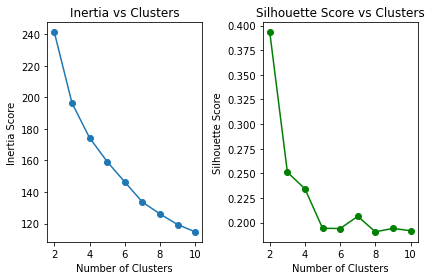

In [8]:
clust_num = [i for i in range(2,11)]
inertias = []
silhouettes = []
for n in clust_num:
    kmeans = KMeans(n_clusters=n).fit(df2)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df2, kmeans.labels_, metric='euclidean'))

plt.subplot(1, 2, 1)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia vs Clusters')
plt.plot(clust_num, inertias, marker='o')

plt.subplot(1, 2, 2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Clusters')
plt.plot(clust_num, silhouettes, marker='o', color='green')

plt.tight_layout()
plt.show()

Our silhouette score maxes out at less than R^2 < 0.40 which indicates that our data is NOT a good candidate for K-means clustering, but this does indicate that our data should be sufficiently similar dismissing our concerns regarding our T-Test assumptions.

# Provide a Boxplot to identify which industries contain outliers (if any)

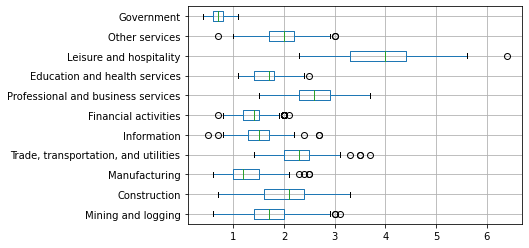

In [9]:
_ = df2.boxplot(vert=False)

# Our initial data

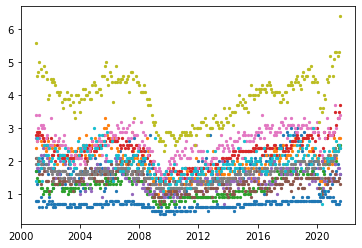

In [10]:
plt.scatter(months, df2['Mining and logging'], s=5)
plt.scatter(months, df2['Construction'], s=5)
plt.scatter(months, df2['Manufacturing'], s=5)
plt.scatter(months, df2['Trade, transportation, and utilities'], s=5)
plt.scatter(months, df2['Information'], s=5)
plt.scatter(months, df2['Financial activities'], s=5)
plt.scatter(months, df2['Professional and business services'], s=5)
plt.scatter(months, df2['Education and health services'], s=5)
plt.scatter(months, df2['Leisure and hospitality'], s=5)
plt.scatter(months, df2['Other services'], s=5)
plt.scatter(months, df2['Government'], s=5)

_ = plt.show()

# Cluster by K-Means

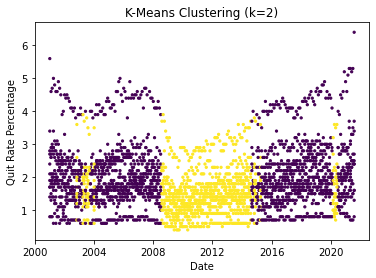

In [11]:
k = 2
industries = df2.columns
kmeans = KMeans(n_clusters=k).fit(df2)
centroids = kmeans.cluster_centers_

plt.scatter(months, df2['Mining and logging'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Construction'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Manufacturing'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Information'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Financial activities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Professional and business services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Education and health services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Other services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Government'], c=kmeans.labels_.astype(float), s=5)

plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('K-Means Clustering (k={})'.format(k))
_ = plt.show()

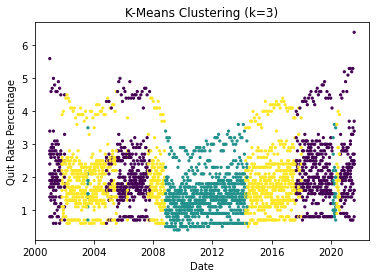

In [12]:
k = 3
industries = df2.columns
kmeans = KMeans(n_clusters=k).fit(df2)
centroids = kmeans.cluster_centers_

plt.scatter(months, df2['Mining and logging'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Construction'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Manufacturing'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Information'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Financial activities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Professional and business services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Education and health services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Other services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Government'], c=kmeans.labels_.astype(float), s=5)

plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('K-Means Clustering (k={})'.format(k))
_ = plt.show()

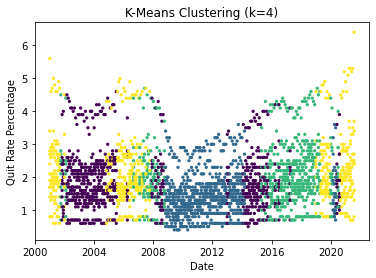

In [13]:
k = 4
industries = df2.columns
kmeans = KMeans(n_clusters=k).fit(df2)
centroids = kmeans.cluster_centers_

plt.scatter(months, df2['Mining and logging'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Construction'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Manufacturing'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Information'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Financial activities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Professional and business services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Education and health services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Other services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Government'], c=kmeans.labels_.astype(float), s=5)

plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('K-Means Clustering (k={})'.format(k))
_ = plt.show()

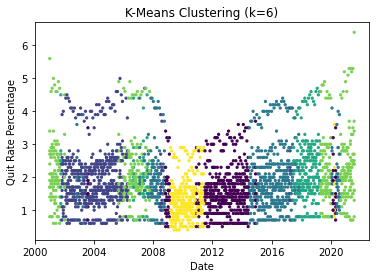

In [14]:
k = 6
industries = df2.columns
kmeans = KMeans(n_clusters=k).fit(df2)
centroids = kmeans.cluster_centers_

plt.scatter(months, df2['Mining and logging'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Construction'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Manufacturing'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Information'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Financial activities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Professional and business services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Education and health services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Other services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Government'], c=kmeans.labels_.astype(float), s=5)

plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('K-Means Clustering (k={})'.format(k))
_ = plt.show()

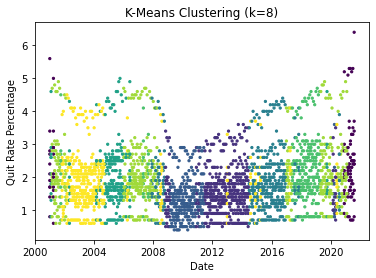

In [15]:
k = 8
industries = df2.columns
kmeans = KMeans(n_clusters=k).fit(df2)
centroids = kmeans.cluster_centers_

plt.scatter(months, df2['Mining and logging'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Construction'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Manufacturing'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Information'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Financial activities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Professional and business services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Education and health services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Other services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Government'], c=kmeans.labels_.astype(float), s=5)

plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('K-Means Clustering (k={})'.format(k))
_ = plt.show()

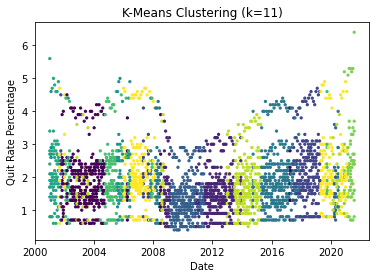

In [16]:
k = 11
industries = df2.columns
kmeans = KMeans(n_clusters=k).fit(df2)
centroids = kmeans.cluster_centers_

plt.scatter(months, df2['Mining and logging'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Construction'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Manufacturing'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Information'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Financial activities'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Professional and business services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Education and health services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Other services'], c=kmeans.labels_.astype(float), s=5)
plt.scatter(months, df2['Government'], c=kmeans.labels_.astype(float), s=5)

plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('K-Means Clustering (k={})'.format(k))
_ = plt.show()

#   Clustering Analysis for past 5 Years

In [17]:
df_original

Total nonfarm  Mining and logging  Construction  Manufacturing  \
0              2.4                 1.7           2.4            1.7   
1              2.3                 1.3           2.6            1.5   
2              2.3                 1.7           2.9            1.4   
3              2.4                 1.7           2.9            1.4   
4              2.3                 1.8           2.6            1.2   
..             ...                 ...           ...            ...   
243            2.8                 1.9           2.4            2.3   
244            2.5                 1.7           2.1            2.0   
245            2.7                 1.9           2.5            2.5   
246            2.7                 1.5           2.7            2.4   
247            2.9                 1.6           2.7            2.5   

     Trade, transportation, and utilities  Information  Financial activities  \
0                                     2.8          2.7                   2.1   
1                                     2.9          1.8                   1.9   
2                                     2.8          1.8                   2.0   
3                                     2.9          2.7                   1.6   
4                                     2.8          2.2                   1.3   
..                                    ...          ...                   ...   
243                                   3.5          1.9                   1.6   
244                                   3.1          1.6                   1.4   
245                                   3.3          1.8                   1.4   
246                                   3.5          1.8                   1.5   
247                                   3.7          1.6                   1.3   

     Professional and business services  Education and health services  \
0                                   3.4                            1.9   
1                                   2.6                            2.1   
2                                   3.0                            2.1   
3                                   3.4                            2.0   
4                                   3.1                            1.9   
..                                  ...                            ...   
243                                 3.7                            2.4   
244                                 3.0                            2.2   
245                                 3.3                            2.3   
246                                 3.3                            2.5   
247                                 3.4                            2.4   

     Leisure and hospitality  Other services  Government  
0                        5.6             1.4         0.8  
1                        4.6             2.7         0.8  
2                        4.7             1.9         0.8  
3                        5.0             2.1         0.6  
4                        4.8             1.8         0.9  
..                       ...             ...         ...  
243                      5.3             2.3         0.8  
244                      5.3             2.6         0.7  
245                      5.2             2.3         0.7  
246                      5.3             2.5         0.7  
247                      6.4             2.4         0.8  

[248 rows x 12 columns]

In [18]:
end = 199
df_five = df_original.drop(df_original.index[0:end])
df_five.drop('Total nonfarm', axis=1, inplace=True)
df_five

Mining and logging  Construction  Manufacturing  \
199                 1.8           2.2            1.5   
200                 2.5           2.4            1.5   
201                 2.8           2.5            1.6   
202                 2.2           1.9            1.5   
203                 2.4           2.1            1.6   
204                 2.9           2.2            1.6   
205                 2.8           2.2            1.7   
206                 2.6           2.2            1.7   
207                 3.0           2.4            1.6   
208                 3.1           2.3            1.6   
209                 2.8           2.5            1.7   
210                 2.9           2.7            1.8   
211                 2.8           2.5            1.7   
212                 3.0           2.2            1.6   
213                 2.6           2.3            1.6   
214                 2.5           2.4            1.7   
215                 2.8           2.4            1.5   
216                 2.3           2.6            1.7   
217                 2.7           2.7            1.6   
218                 2.9           2.0            1.7   
219                 2.4           1.9            1.8   
220                 1.9           2.2            1.6   
221                 1.8           2.5            1.6   
222                 1.9           2.3            1.5   
223                 1.9           2.3            1.6   
224                 1.5           2.4            1.7   
225                 1.7           2.4            1.6   
226                 2.0           2.2            1.5   
227                 1.8           2.2            1.6   
228                 2.0           2.1            1.5   
229                 1.9           2.0            1.5   
230                 1.3           1.8            1.2   
231                 0.9           1.4            1.0   
232                 1.1           1.4            1.2   
233                 1.4           1.9            1.7   
234                 1.7           2.0            1.6   
235                 1.1           1.3            1.9   
236                 1.3           2.0            2.1   
237                 1.4           1.8            1.9   
238                 2.0           2.2            1.9   
239                 1.6           2.2            2.0   
240                 1.3           1.9            2.1   
241                 2.1           2.3            2.1   
242                 1.5           2.7            2.1   
243                 1.9           2.4            2.3   
244                 1.7           2.1            2.0   
245                 1.9           2.5            2.5   
246                 1.5           2.7            2.4   
247                 1.6           2.7            2.5   

     Trade, transportation, and utilities  Information  Financial activities  \
199                                   2.4          1.6                   1.2   
200                                   2.4          1.8                   1.3   
201                                   2.3          1.5                   1.5   
202                                   2.3          1.6                   1.4   
203                                   2.5          1.8                   1.5   
204                                   2.4          1.6                   1.4   
205                                   2.3          1.8                   1.4   
206                                   2.4          1.6                   1.3   
207                                   2.5          1.6                   1.1   
208                                   2.6          1.8                   1.3   
209                                   2.6          1.8                   1.4   
210                                   2.6          1.7                   1.5   
211                                   2.7          1.6                   1.6   
212                                   2.8          1.6                   1.5   
213 

# Check the Inertia and Silhouette scores of our K clusters (5 Year Data)

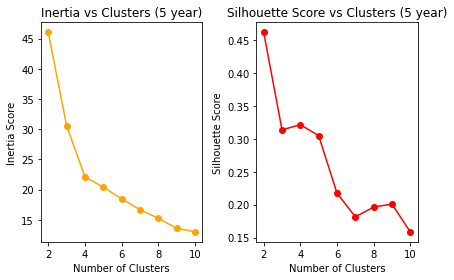

In [19]:
clust_num = [i for i in range(2,11)]
inertias = []
silhouettes = []
for n in clust_num:
    kmeans = KMeans(n_clusters=n).fit(df_five)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_five, kmeans.labels_, metric='euclidean'))

plt.subplot(1, 2, 1)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia vs Clusters (5 year)')
plt.plot(clust_num, inertias, marker='o', color='orange')

plt.subplot(1, 2, 2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Clusters (5 year)')
plt.plot(clust_num, silhouettes, marker='o', color='red')

plt.tight_layout()
plt.show()

## Clustering the 5 year data

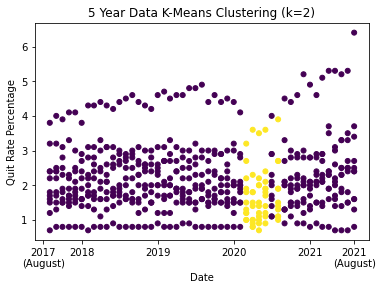

In [20]:
k = 2
industries = df_five.columns
kmeans = KMeans(n_clusters=k).fit(df_five)
centroids = kmeans.cluster_centers_

plt.scatter(months[end:], df_five['Mining and logging'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Construction'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Manufacturing'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Information'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Financial activities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Professional and business services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Education and health services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Other services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Government'], c=kmeans.labels_.astype(float), s=25)

plt.xticks(['2017-07-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2021-08-01'], ['2017\n(August)', '2018', '2019', '2020', '2021', '2021\n(August)'])
plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('5 Year Data K-Means Clustering (k={})'.format(k))
_ = plt.show()

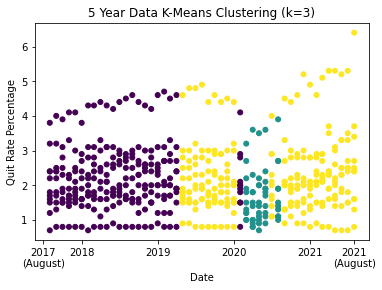

In [21]:
k = 3
industries = df_five.columns
kmeans = KMeans(n_clusters=k).fit(df_five)
centroids = kmeans.cluster_centers_

plt.scatter(months[end:], df_five['Mining and logging'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Construction'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Manufacturing'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Information'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Financial activities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Professional and business services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Education and health services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Other services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Government'], c=kmeans.labels_.astype(float), s=25)

plt.xticks(['2017-07-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2021-08-01'], ['2017\n(August)', '2018', '2019', '2020', '2021', '2021\n(August)'])
plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('5 Year Data K-Means Clustering (k={})'.format(k))
_ = plt.show()

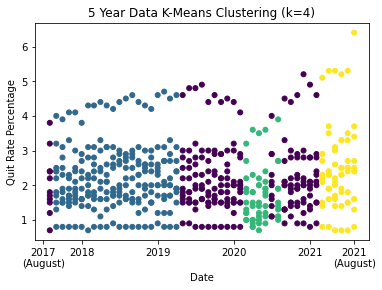

In [22]:
k = 4
industries = df_five.columns
kmeans = KMeans(n_clusters=k).fit(df_five)
centroids = kmeans.cluster_centers_

plt.scatter(months[end:], df_five['Mining and logging'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Construction'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Manufacturing'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Information'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Financial activities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Professional and business services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Education and health services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Other services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Government'], c=kmeans.labels_.astype(float), s=25)

plt.xticks(['2017-07-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2021-08-01'], ['2017\n(August)', '2018', '2019', '2020', '2021', '2021\n(August)'])
plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('5 Year Data K-Means Clustering (k={})'.format(k))
_ = plt.show()

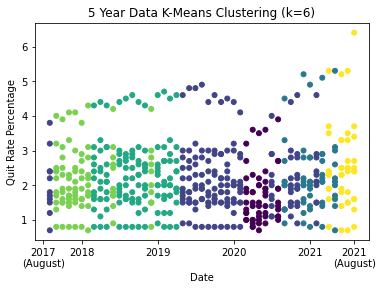

In [23]:
k = 6
industries = df_five.columns
kmeans = KMeans(n_clusters=k).fit(df_five)
centroids = kmeans.cluster_centers_

plt.scatter(months[end:], df_five['Mining and logging'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Construction'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Manufacturing'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Information'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Financial activities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Professional and business services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Education and health services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Other services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Government'], c=kmeans.labels_.astype(float), s=25)

plt.xticks(['2017-07-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2021-08-01'], ['2017\n(August)', '2018', '2019', '2020', '2021', '2021\n(August)'])
plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('5 Year Data K-Means Clustering (k={})'.format(k))
_ = plt.show()

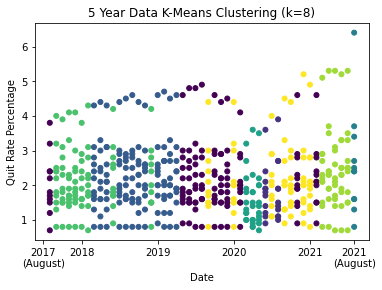

In [24]:
k = 8
industries = df_five.columns
kmeans = KMeans(n_clusters=k).fit(df_five)
centroids = kmeans.cluster_centers_

plt.scatter(months[end:], df_five['Mining and logging'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Construction'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Manufacturing'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Information'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Financial activities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Professional and business services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Education and health services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Other services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Government'], c=kmeans.labels_.astype(float), s=25)

plt.xticks(['2017-07-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2021-08-01'], ['2017\n(August)', '2018', '2019', '2020', '2021', '2021\n(August)'])
plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('5 Year Data K-Means Clustering (k={})'.format(k))
_ = plt.show()

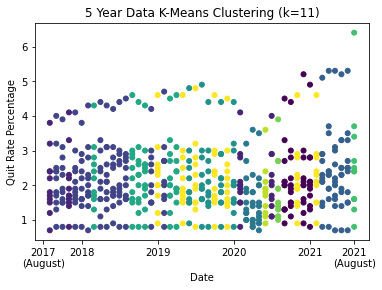

In [25]:
k = 11
industries = df_five.columns
kmeans = KMeans(n_clusters=k).fit(df_five)
centroids = kmeans.cluster_centers_

plt.scatter(months[end:], df_five['Mining and logging'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Construction'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Manufacturing'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Information'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Financial activities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Professional and business services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Education and health services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Other services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Government'], c=kmeans.labels_.astype(float), s=25)

plt.xticks(['2017-07-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2021-08-01'], ['2017\n(August)', '2018', '2019', '2020', '2021', '2021\n(August)'])
plt.xlabel('Date')
plt.ylabel('Quit Rate Percentage')
plt.title('5 Year Data K-Means Clustering (k={})'.format(k))
_ = plt.show()

For repetitive code, use format and an iterated list to create consistent visuals.

In [26]:
for item in industries:
    print("plt.scatter(months[end:], df_five['{}'], c=kmeans.labels_.astype(float), s=25)".format(item))

plt.scatter(months[end:], df_five['Mining and logging'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Construction'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Manufacturing'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Trade, transportation, and utilities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Information'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Financial activities'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Professional and business services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Education and health services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Leisure and hospitality'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[end:], df_five['Other services'], c=kmeans.labels_.astype(float), s=25)
plt.scatter(months[e